# Course 1 - Introduction to TensorFlow


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Week 01

### Theory
---

`tf.keras.Sequential()[layer_0, layer_1]` - It's how NN sequential layers 

`keras.layers.Dense(units=1, input_shape=[1])` 

- **Dense** - a fully connected layer
- **units** - how many neurons

`model.compile(loss='mean_squared_error', optimizer='sgd')`

- **Compile** - Configures the model for training.
- **loss** - How good prediction
- **optimizer** - Make another guess

`model.fit(x, y, epochs=500)`

- **Fit** - Trains the model for a fixed number of epochs (iterations on a dataset)
- **Epochs** - The model is not trained for a number of iterations given by epochs

### Excesses

---

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [4]:
model =  keras.Sequential([
                           keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss='mean_squared_error', optimizer='sgd')

xs = [ 1.0, 2.0, 3.0, 4.0, 5.0 ]
ys = [ 100, 150, 200, 250, 300 ]
model.fit(xs, ys, epochs=500, verbose=0)
print(model.predict([7.0]))

# Output: [[405.00]] 

[[405.7532]]


---
# Week 02

In [4]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Train Labels: 9


Image Array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0

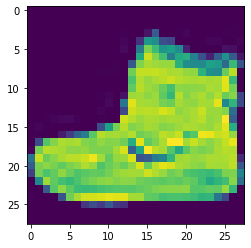

In [8]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print('Train Labels:', training_labels[0])
print('\n\nImage Array:',training_images[0])

In [10]:
# We used normalization for help our nn cause small number better
# And we did gap between [0, 1]
training_images = training_images / 255.0
test_images =  test_images / 255.0

In [13]:
# Design Our Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, verbose=0)

In [18]:
model.evaluate(test_images, test_labels)
# Accuracy: 87%, Loss: 34% 

10000/10000 [==============================] - 0s 50us/sample - loss: 0.3455 - accuracy: 0.8780


[0.345508541226387, 0.878]

## Exploration Exercises
---
### Exercise 1:

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [25]:
classifications = model.predict(test_images)
# It's softmax probability of every label, where big numbers it's probably, our output 
print(classifications[1])
# Show us max value index in array
print("Index of max value:", np.argmax(classifications[1]))

[4.9782382e-05 3.0516620e-11 9.9873608e-01 5.6757721e-10 9.5729128e-04
 6.6905738e-11 2.5675836e-04 2.3567362e-17 1.2143647e-08 4.1655598e-16]
Index of max value: 2


In [24]:
print(test_labels[1])

2


### Callbacks
it's method to stop our NN
* [Callbacks Manual](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback "Callback")

In [33]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.6):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.4708 - accuracy: 0.8319 ETA: 0s - loss: 0.4720 - accuracy: 0.
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4707 - accuracy: 0.8320


# Week 03
---
Adding Conv And MaxPolling Layers

In [14]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True


mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

callbacks = Callbacks()

x_train = x_train / 255.0
x_test = x_test / 255.0

model = keras.Sequential([
    keras.layers.Conv2D(64, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [15]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               147584    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 54s 902us/sample - loss: 0.4399 - accuracy: 0.8410
Epoch 2/5
60000/60000 [==============================] - 41s 691us/sample - loss: 0.3024 - accuracy: 0.8895
Epoch 3/5
60000/60000 [==============================] - 40s 668us/sample - loss: 0.2588 - accuracy: 0.9040
Epoch 4/5
60000/60000 [==============================] - 40s 661us/sample - loss: 0.2282 - accuracy: 0.9150
Epoch 5/5
60000/60000 [==============================] - 40s 667us/sample - loss: 0.2040 - accuracy: 0.9240


In [19]:
test_loss = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 187us/sample - loss: 0.2573 - accuracy: 0.9079


### We get 92% on train set and 91% on test 

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. **The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes.** Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [18]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


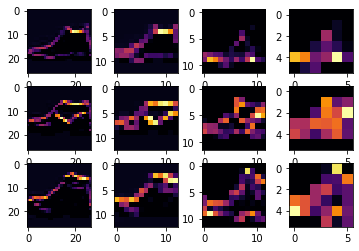

In [25]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

### Model With One Conv2D

In [26]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True


mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

callbacks = Callbacks()

x_train = x_train / 255.0
x_test = x_test / 255.0

model = keras.Sequential([
    keras.layers.Conv2D(64, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])
test_loss = model.evaluate(x_test, y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 1,386,186
Trainable params: 1,386,186
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 744us/sample - loss: 0.390

### We get 94% on train set and 89% on test, worst on test

---
# Week 04
---